<div style="text-align: center; background-color: #FF0000; font-family: 'Georgia', serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    PROGRAMMING FOR DATA SCIENCE
  <div style="text-align: center; background-color: #FF0000; font-family: 'Georgia', serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 
  </div>
  <div style="text-align: center; background-color: #FF0000; font-family: 'Georgia', serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FINAL PROJECT 
  </div>
</div>

<div style="text-align: center; background-color: #ffc8a0; font-family: Verdana, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    DATA ANALYTICS AND VISUALIZATION
</div>

Câu hỏi: Mối quan hệ giữa các chất hóa học (Chlorides, Sulfur Dioxide) và sự ổn định của rượu có như thế nào?

Các yếu tố như lượng axit (Fixed Acidity, Citric Acid), đường dư, và sulfit có tương quan với nhau như thế nào, và chúng cùng tác động đến cảm nhận hương vị của rượu?

Liệu sự kết hợp của các thuộc tính hóa học (Fixed Acidity, Volatile Acidity, Chlorides) có mối quan hệ mạnh với chất lượng của rượu?

- Phân tích tương quan giữa mật độ và nồng độ cồn.

In [10]:
import pandas as pd

df = pd.read_csv("../Datasets/winequality-red.csv")
print(df)

# Tính hệ số tương quan giữa 'Density' và 'Alcohol'
correlation = df['density'].corr(df['alcohol'])
print(f"Hệ số tương quan giữa mật độ và nồng độ cồn là: {correlation}")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

- Hệ số tương quan -0.5 chỉ ra một mối quan hệ trung bình, âm giữa mật độ và nồng độ cồn, với xu hướng là mật độ giảm khi nồng độ cồn tăng, điều này có thể giải thích bằng sự khác biệt về mật độ giữa ethanol và nước trong rượu vang.

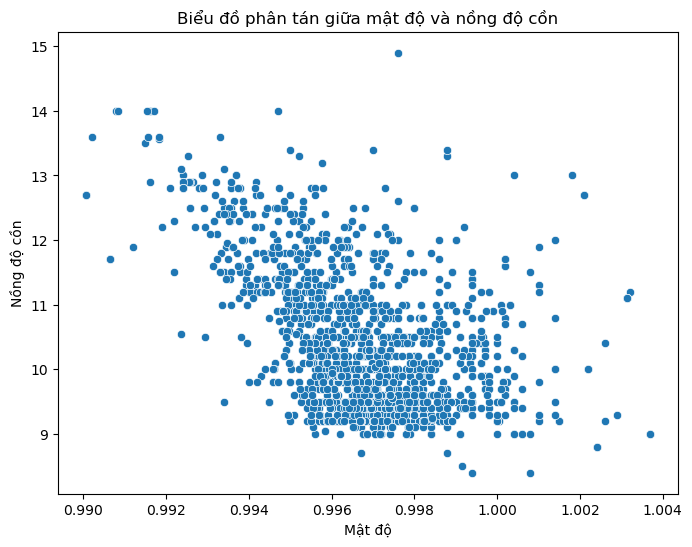

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ phân tán giữa 'Density' và 'Alcohol'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='alcohol', data=df)

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân tán giữa mật độ và nồng độ cồn')
plt.xlabel('Mật độ')
plt.ylabel('Nồng độ cồn')

# Hiển thị biểu đồ
plt.show()

Nhận xét:
- **Mối quan hệ âm**: Có mối quan hệ âm giữa **mật độ** và **nồng độ cồn**.
- **Khả năng dự đoán**: Tuy mối quan hệ này có thể giúp chỉ ra một số xu hướng, nhưng nó không mạnh đủ để dự đoán chính xác nồng độ cồn chỉ dựa vào mật độ.
- **Sự phân tán**: Dữ liệu phân tán, cho thấy rằng còn nhiều yếu tố khác ngoài mật độ ảnh hưởng đến nồng độ cồn trong rượu vang.


Biểu đồ cho thấy mối quan hệ âm giữa mật độ (Density) và nồng độ cồn (Alcohol), với xu hướng mật độ giảm khi nồng độ cồn tăng. Tuy nhiên, mối quan hệ này yếu và không hoàn toàn tuyến tính, với dữ liệu phân tán và không tập trung vào một đường thẳng rõ ràng.

Liệu mật độ (Density) có thể giúp dự đoán nồng độ cồn trong rượu (được xác định gián tiếp từ các chỉ số khác như "Alcohol")?

Mối quan hệ giữa các chất hóa học (Chlorides, Sulfur Dioxide) và sự ổn định của rượu có như thế nào?

Sự kết hợp của các thuộc tính (như lượng axit, đường dư, và SO₂) có thể được sử dụng để dự đoán chất lượng rượu như thế nào?

Liệu các chỉ số axit (Fixed Acidity, Volatile Acidity, và Citric Acid) có mối quan hệ như thế nào với chất lượng rượu (Quality)?

Liệu lượng đường dư (Residual Sugar) và sulfur dioxide (Free SO₂ và Total SO₂) có ảnh hưởng như thế nào đến chất lượng rượu?